In [1]:
import sys
import os
sys.path.append('D:\\SynologyDrive\\Univ\\kenkyuu\\gtrap\\gtrap')
os.environ['CPLUS_INCLUDE_PATH']=r'D:\SynologyDrive\Univ\kenkyuu\gtrap\include'

In [2]:
import time
import matplotlib.pyplot as plt
import math
import numpy as np
import getstat
import read_tesslc as tes
from astropy.io import fits

In [3]:
def filename(sector,tic):
    if sector<=13:
        filename='F'
    else:
        filename='G'
    filename=filename+':\\/QLP/YEAR'
    if sector<=13:
        filename=filename+'1'
    else:
        filename=filename+'2'
    filename=filename+'/s'+str(sector).zfill(4)+'/'
    filename=filename+str(tic//1000000000000).zfill(4)+'/'+str(tic//100000000%10000).zfill(4)+'/'+str(tic//10000%10000).zfill(4)+'/'+str(tic%10000).zfill(4)+'/'
    filename=filename+'hlsp_qlp_tess_ffi_s'+str(sector).zfill(4)+'-'+str(tic).zfill(16)+'_tess_v01_llc.fits'
    return filename  

In [18]:
start = time.time()
dirlist=[filename(2,30407196)]
print(dirlist)
lc,tu,n,ntrue,nq,inval, bjdoffset,t0arr, t, det, info=tes.load_tesslc(dirlist)
elapsed_time = time.time() - start
print (("2 :{0}".format(elapsed_time)) + "[sec]")
print(n,ntrue,nq)

['F:\\/QLP/YEAR1/s0002/0000/0000/3040/7196/hlsp_qlp_tess_ffi_s0002-0000000030407196_tess_v01_llc.fits']
2 :0.016956567764282227[sec]
2000 [1245] 1


In [19]:
lc=lc[tu!=[inval]]
tu=tu[tu!=[inval]]
lc=lc[tu!=[0.]]
tu=tu[tu!=[0.]]
lc=lc.reshape([len(lc),1])
tu=tu.reshape([len(tu),1])
n=len(lc)
ntrue=np.array([n])

In [20]:
offset,imgout=np.mean(lc,axis=1),lc #???

In [23]:
P=0.424037858099971
pphase1=0.248459682
pphase2=0.33666287
t0=-1
Epoc=(pphase1+pphase2)/2
Duration=(pphase2-pphase1)

def average_in_transit(time,flux,duration,period,t0):
  n=0
  sum=0
  for i in range(0,len(time)):
    t=(time[i]-t0)%period
    assert 0<=t and t<=period
    if (duration/2<=t and t<=period-duration/2) or time[i]<=0.1:
      pass
    else:
      n+=1
      sum+=flux[i]
  if n==0:
    return 0
  return sum/n
def average_out_of_transit(time,flux,duration,period,t0):
  n=0
  sum=0
  for i in range(0,len(time)):
    t=(time[i]-t0)%period
    assert 0<=t and t<=period
    if (duration/2<=t and t<=period-duration/2) and time[i]>0.1:
      n+=1
      sum+=flux[i]
  if n==0:
    return 0
  return sum/n

print(average_in_transit(tu,imgout,Duration,P,Epoc),average_out_of_transit(tu,imgout,Duration,P,Epoc))

[0.9829835] [1.0026405]


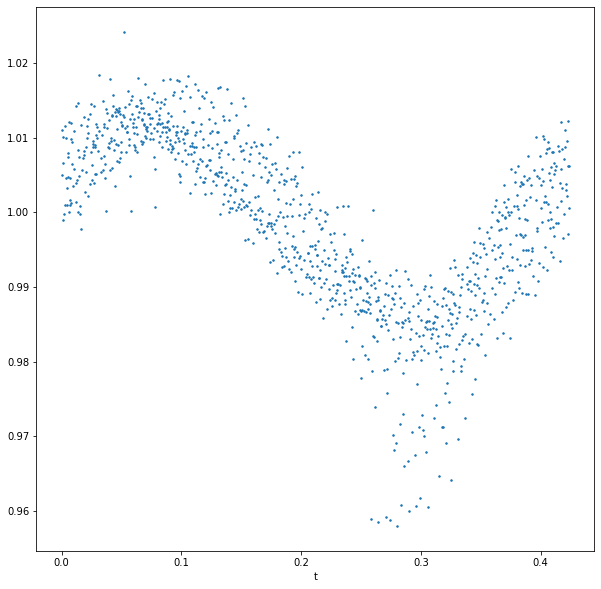

In [24]:
    Pest=[P]
    fig = plt.figure(figsize=(10,10))
    for j in range(0,np.min([nq,5])):
        ax=fig.add_subplot(np.min([nq,5]),1,j+1)
        ax.plot(np.mod(tu[:,j],Pest[j]), imgout[:,j],".",markersize=3)
    plt.xlabel("t")
    plt.show()